In [1]:
import os
os.chdir("/home/ewert//Projekte/bnelearn")

In [2]:
import torch
import matplotlib.pyplot as plt
from bnelearn.strategy import NeuralNetStrategy

In [3]:
# import models
models = {
    (3,1.0): "/home/ewert/bnelearn/crowdsourcing_plots/single_item/contest/tullock_lottery/valuations/2022-04-06 Wed 10.12/00 10:12:33 0/models/model_0.pt",
    (3,0.8): "/home/ewert/bnelearn/crowdsourcing_plots/single_item/contest/tullock_lottery/valuations/2022-04-06 Wed 10.13/00 10:13:51 0/models/model_0.pt",
    (3,0.6): "/home/ewert/bnelearn/crowdsourcing_plots/single_item/contest/tullock_lottery/valuations/2022-04-06 Wed 10.15/00 10:15:12 0/models/model_0.pt"
}

In [4]:
def bne_crowdsourcing_valuations(valuation: torch.Tensor, v1: float = 1, v2 = 0, m: float = 0, player_position=0, **kwargs):

    a = lambda m, v: 2/(1-m) * ((m**3)/(6*(1-m)) + (v ** 3)/(3*(1-m)) - (m*v**2)/(2*(1-m)))
    b = lambda m, v: 2/(1-m) * (-(m**3)/(3*(1-m)) - (m ** 2)/2 - (2 * v **3)/(3*(1-m)) + (m * v ** 2)/(1-m) + (v ** 2)/2)

    return v1 * a(m, valuation) + v2 * b(m, valuation)

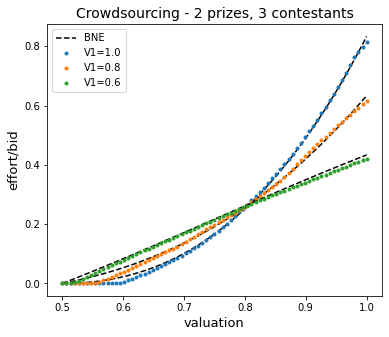

In [5]:
plt.figure(figsize=(6,5))

for key in models:
    # load model 
    model = NeuralNetStrategy(input_length=1, hidden_nodes=[10, 10], hidden_activations=[torch.nn.SELU(), torch.nn.SELU()])
    model.load_state_dict(torch.load(models[key]))
    model.eval()

    # add corresponding BNE line
    cv = torch.linspace(0.5, 1.0, 75).to(next(model.parameters()).device).unsqueeze(-1)

    bne = bne_crowdsourcing_valuations(cv, v1=key[1], v2=(1-key[1]), m=0.5)
    if key[1] == 1:
        plt.plot(cv.cpu(), bne, marker='', linestyle='dashed', color="black", label="BNE")
    else:
        plt.plot(cv.cpu(), bne, marker='', linestyle='dashed', color="black")

    # predict
    pred = model(cv).detach().cpu()
    plt.plot(cv.cpu(), pred, marker='.', linestyle='None', label=f'V1={key[1]}')

    
plt.legend()
plt.xlabel('valuation', fontsize=13)

plt.ylabel('effort/bid', fontsize=13)
plt.title('Crowdsourcing - 2 prizes, 3 contestants', fontsize=14)

#plt.show()
plt.savefig("NPGA_crowdsourcing_valuations.pdf")
